In [83]:
#Author:Rony Guerra

#I practiced touch typing for 30 days. I started using monkeytype and recorded my daily progression.

#The dataset includes each test with a list of description for wpm, accuracy, mode, date, and etc.

#Questions to Answer:
#1.How many test did I complete each day?
#2.What is my average words per minute per day?
#3.What is my top speed words per minute per day?
#4.What is my average accuracy per day?

## Import Module

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
df = pd.read_csv('typeresultscsv.csv')

In [4]:
df.head()

,_id,isPb,wpm,acc,rawWpm,consistency,charStats,charStats2,chartStats3,chartStats4,...,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp,date
0,62d0942482f2035316fa440d,NaN,39.39,93.52,49.76,64.39,171,7,0,0,...,False,english,none,normal,False,False,False,NaN,1.660000e+12,7/14/2022
1,62d0947982f2035316fa4578,NaN,27.92,90.08,39.97,44.39,176,15,1,7,...,False,english,none,normal,False,False,False,NaN,1.660000e+12,7/14/2022
2,62d094ac82f2035316fa4650,NaN,29.96,86.70,46.68,56.83,120,14,1,0,...,False,english,none,normal,False,False,False,NaN,1.660000e+12,7/14/2022
3,62d094f482f2035316fa477b,NaN,36.01,90.11,45.98,59.76,206,15,0,1,...,False,english,none,normal,False,False,False,NaN,1.660000e+12,7/14/2022
4,62d0952482f2035316fa4852,NaN,34.30,90.63,44.90,60.80,97,7,0,0,...,False,english,none,normal,False,False,False,NaN,1.660000e+12,7/14/2022


In [5]:
df.columns

Index(['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats',
       'charStats2', 'chartStats3', 'chartStats4', 'mode', 'mode2',
       'quoteLength', 'restartCount', 'testDuration', 'afkDuration',
       'incompleteTestSeconds', 'punctuation', 'numbers', 'language', 'funbox',
       'difficulty', 'lazyMode', 'blindMode', 'bailedOut', 'tags', 'timestamp',
       'date'],
      dtype='object')

In [6]:
df.drop(df.columns[[1,6,7,8,9,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id          1105 non-null   object 
 1   wpm          1105 non-null   float64
 2   acc          1105 non-null   float64
 3   rawWpm       1105 non-null   float64
 4   consistency  1105 non-null   float64
 5   mode         1105 non-null   object 
 6   mode2        1105 non-null   int64  
 7   date         1105 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 69.2+ KB


In [8]:
df['mode'] = df['mode'] + ' ' + df['mode2'].astype(str)

In [9]:
df.head()

,_id,wpm,acc,rawWpm,consistency,mode,mode2,date
0,62d0942482f2035316fa440d,39.39,93.52,49.76,64.39,quote 577,577,7/14/2022
1,62d0947982f2035316fa4578,27.92,90.08,39.97,44.39,quote 4729,4729,7/14/2022
2,62d094ac82f2035316fa4650,29.96,86.70,46.68,56.83,quote 5834,5834,7/14/2022
3,62d094f482f2035316fa477b,36.01,90.11,45.98,59.76,quote 643,643,7/14/2022
4,62d0952482f2035316fa4852,34.30,90.63,44.90,60.80,quote 4435,4435,7/14/2022


In [10]:
df.drop('mode2',axis=1,inplace=True)

In [11]:
df['error_rate'] = 100 - df['acc']

In [12]:
df.head(1)

,_id,wpm,acc,rawWpm,consistency,mode,date,error_rate
0,62d0942482f2035316fa440d,39.39,93.52,49.76,64.39,quote 577,7/14/2022,6.48


In [13]:
df.rename(columns={'_id': 'id', 'acc': 'accuracy_rate'}, inplace=True)

In [14]:
df = df[['id','wpm','accuracy_rate','error_rate','rawWpm','consistency','mode','date']]

In [15]:
df.head()

,id,wpm,accuracy_rate,error_rate,rawWpm,consistency,mode,date
0,62d0942482f2035316fa440d,39.39,93.52,6.48,49.76,64.39,quote 577,7/14/2022
1,62d0947982f2035316fa4578,27.92,90.08,9.92,39.97,44.39,quote 4729,7/14/2022
2,62d094ac82f2035316fa4650,29.96,86.70,13.30,46.68,56.83,quote 5834,7/14/2022
3,62d094f482f2035316fa477b,36.01,90.11,9.89,45.98,59.76,quote 643,7/14/2022
4,62d0952482f2035316fa4852,34.30,90.63,9.37,44.90,60.80,quote 4435,7/14/2022


In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.head()

,id,wpm,accuracy_rate,error_rate,rawWpm,consistency,mode,date
0,62d0942482f2035316fa440d,39.39,93.52,6.48,49.76,64.39,quote 577,2022-07-14
1,62d0947982f2035316fa4578,27.92,90.08,9.92,39.97,44.39,quote 4729,2022-07-14
2,62d094ac82f2035316fa4650,29.96,86.70,13.30,46.68,56.83,quote 5834,2022-07-14
3,62d094f482f2035316fa477b,36.01,90.11,9.89,45.98,59.76,quote 643,2022-07-14
4,62d0952482f2035316fa4852,34.30,90.63,9.37,44.90,60.80,quote 4435,2022-07-14


## Task#1:How many tests did I complete each day?

In [18]:
df['count'] = 1
total_tests = df.groupby(['date']).sum().reset_index()[['date','count']]
total_tests

,date,count
0,2022-07-14,29
1,2022-07-15,239
2,2022-07-16,128
3,2022-07-17,26
4,2022-07-20,13
5,2022-07-21,30
6,2022-07-22,99
7,2022-07-23,137
8,2022-07-28,119
9,2022-07-29,144


In [19]:
total_test = df['count'].sum()
total_test # I completed a total of 1105 tests.

1105

In [91]:
date = total_tests['date']
test = total_tests['count']

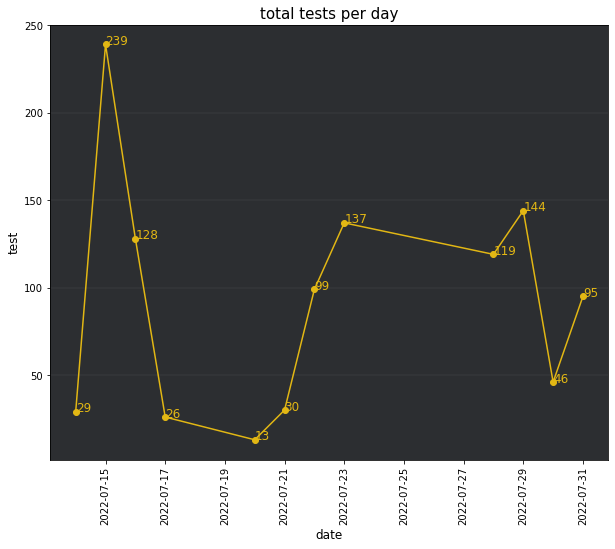

In [97]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plt.plot(date, test, marker='o',color='#E2B714')
plt.title('total tests per day', size=15)
plt.xlabel('date', size=12)
plt.ylabel('test', size=12)
plt.xticks(rotation=90)
ax.set_facecolor('#2C2E31')
ax.yaxis.grid(which="major", color='#323437', linestyle='-', linewidth=2)
for index in range(len(date)):
  ax.text(date[index], test[index], test[index], size=12,color='#E2B714')

plt.show()

## Task#2:What is my average words per minute per day?

In [22]:
df.head(2)

,id,wpm,accuracy_rate,error_rate,rawWpm,consistency,mode,date,count
0,62d0942482f2035316fa440d,39.39,93.52,6.48,49.76,64.39,quote 577,2022-07-14,1
1,62d0947982f2035316fa4578,27.92,90.08,9.92,39.97,44.39,quote 4729,2022-07-14,1


In [23]:
total_average_wpm = df['wpm'].mean()

In [24]:
total_average_wpm

51.67791855203623

In [25]:
average_wpm_per_day = df.groupby(['date']).mean().reset_index()[['date','wpm']]

In [26]:
average_wpm_per_day

,date,wpm
0,2022-07-14,34.304483
1,2022-07-15,43.305105
2,2022-07-16,41.083438
3,2022-07-17,49.423846
4,2022-07-20,53.992308
5,2022-07-21,54.861333
6,2022-07-22,52.417778
7,2022-07-23,54.571898
8,2022-07-28,60.553613
9,2022-07-29,58.427847


In [27]:
max_average_wpm = average_wpm_per_day['wpm'].max()
max_average_wpm

61.56847826086957

In [28]:
date = average_wpm_per_day['date']
average_wpm = round(average_wpm_per_day['wpm'], 2)

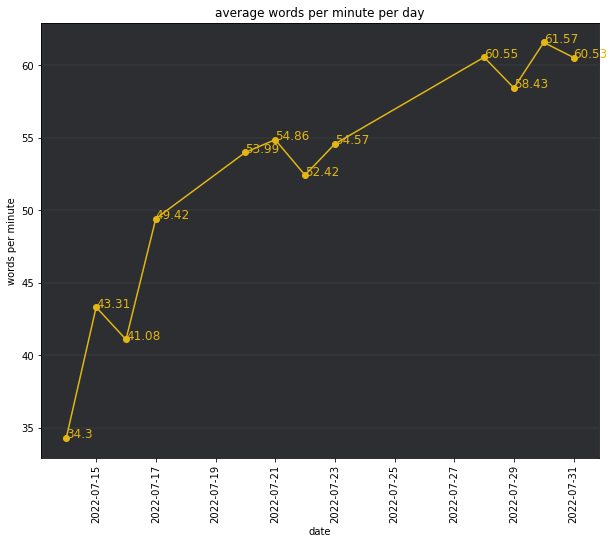

In [96]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plt.plot(date, average_wpm, marker='o',color='#E2B714')
plt.title('average words per minute per day')
plt.xlabel('date')
plt.ylabel('words per minute')
plt.xticks(rotation=90)
ax.set_facecolor('#2C2E31')
ax.yaxis.grid(which="major", color='#323437', linestyle='-', linewidth=2)
for index in range(len(date)):
  ax.text(date[index], average_wpm[index], average_wpm[index], size=12,color='#E2B714')
plt.show()

## Task#3:What is my top speed words per minute per day?

In [30]:
top_wpm_speed = df['wpm'].max()
top_wpm_speed

78.37

In [31]:
top_speed = df.groupby(['date']).max().reset_index()[['date','wpm']]
top_speed

,date,wpm
0,2022-07-14,44.21
1,2022-07-15,65.20
2,2022-07-16,59.20
3,2022-07-17,62.78
4,2022-07-20,62.40
5,2022-07-21,64.00
6,2022-07-22,69.98
7,2022-07-23,66.80
8,2022-07-28,74.40
9,2022-07-29,76.80


In [32]:
date = top_speed['date']
speed = top_speed['wpm']

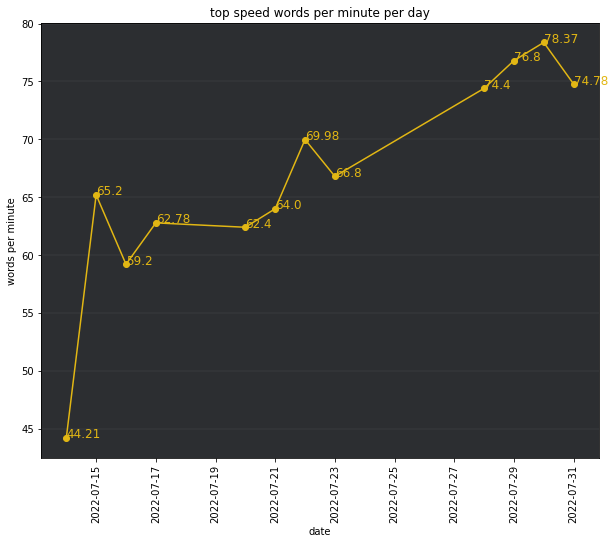

In [95]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plt.plot(date, speed, marker='o',color='#E2B714')
plt.title('top speed words per minute per day')
plt.xlabel('date')
plt.ylabel('words per minute')
plt.xticks(rotation=90)
ax.set_facecolor('#2C2E31')
ax.yaxis.grid(which="major", color='#323437', linestyle='-', linewidth=2)
for index in range(len(date)):
  ax.text(date[index], speed[index], speed[index], size=12,color='#E2B714')
plt.show()

## Task#4:What is my average accuracy per tests?

In [34]:
top_average_acc = df['accuracy_rate'].mean()
top_average_acc

92.51563800904998

In [35]:
average_acc = df.groupby(['date']).mean().reset_index()[['date','accuracy_rate']]
average_acc

,date,accuracy_rate
0,2022-07-14,91.201379
1,2022-07-15,91.938577
2,2022-07-16,92.536328
3,2022-07-17,93.260000
4,2022-07-20,95.886923
5,2022-07-21,95.760000
6,2022-07-22,93.422929
7,2022-07-23,90.740365
8,2022-07-28,93.651261
9,2022-07-29,91.217708


In [36]:
date = average_acc['date']
accuracy = round(average_acc['accuracy_rate'], 2)

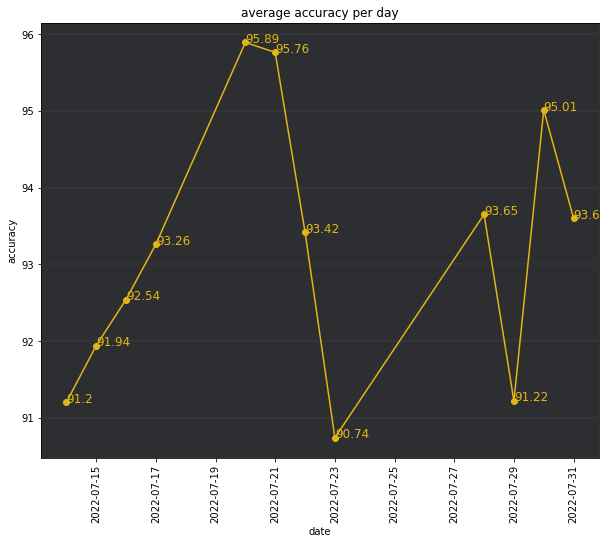

In [94]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plt.plot(date, accuracy, marker='o',color='#E2B714')
plt.title('average accuracy per day')
plt.xlabel('date')
plt.ylabel('accuracy')
plt.xticks(rotation=90)
ax.set_facecolor('#2C2E31')
ax.yaxis.grid(which="major", color='#323437', linestyle='-', linewidth=2)
for index in range(len(date)):
  ax.text(date[index], accuracy[index], accuracy[index], size=12,color='#E2B714')
plt.show()

## Task#5:Daily Progress

In [38]:
df.head(2)

,id,wpm,accuracy_rate,error_rate,rawWpm,consistency,mode,date,count
0,62d0942482f2035316fa440d,39.39,93.52,6.48,49.76,64.39,quote 577,2022-07-14,1
1,62d0947982f2035316fa4578,27.92,90.08,9.92,39.97,44.39,quote 4729,2022-07-14,1


In [39]:
daily_progress = df[['id','wpm']]

In [40]:
daily_progress

,id,wpm
0,62d0942482f2035316fa440d,39.39
1,62d0947982f2035316fa4578,27.92
2,62d094ac82f2035316fa4650,29.96
3,62d094f482f2035316fa477b,36.01
4,62d0952482f2035316fa4852,34.30
...,...,...
1100,62e5ff21303adee462def8a0,52.78
1101,62e5ff86303adee462defa43,66.40
1102,62e60016303adee462defcb3,65.16
1103,62e60064303adee462defdf4,62.00


In [45]:
error_rate = df[['id','error_rate']]
error_rate

,id,error_rate
0,62d0942482f2035316fa440d,6.48
1,62d0947982f2035316fa4578,9.92
2,62d094ac82f2035316fa4650,13.30
3,62d094f482f2035316fa477b,9.89
4,62d0952482f2035316fa4852,9.37
...,...,...
1100,62e5ff21303adee462def8a0,8.33
1101,62e5ff86303adee462defa43,1.73
1102,62e60016303adee462defcb3,7.14
1103,62e60064303adee462defdf4,3.66


In [46]:
progress_df = pd.merge(daily_progress, error_rate, how='outer')
progress_df

,id,wpm,error_rate
0,62d0942482f2035316fa440d,39.39,6.48
1,62d0947982f2035316fa4578,27.92,9.92
2,62d094ac82f2035316fa4650,29.96,13.30
3,62d094f482f2035316fa477b,36.01,9.89
4,62d0952482f2035316fa4852,34.30,9.37
...,...,...,...
1100,62e5ff21303adee462def8a0,52.78,8.33
1101,62e5ff86303adee462defa43,66.40,1.73
1102,62e60016303adee462defcb3,65.16,7.14
1103,62e60064303adee462defdf4,62.00,3.66


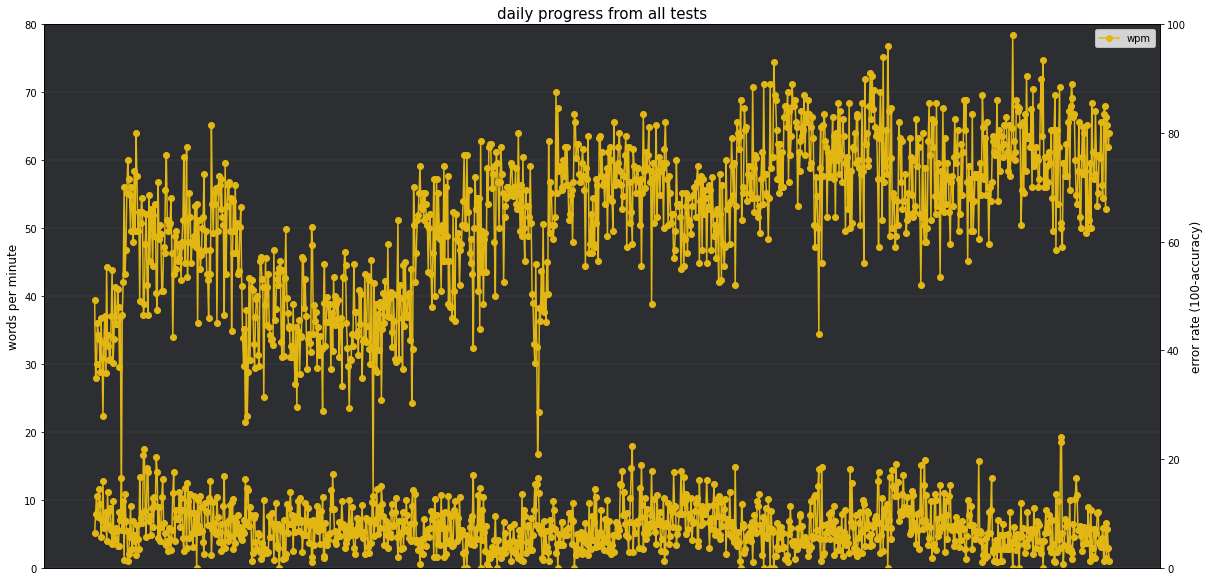

In [82]:
x = progress_df['id']
y1 = progress_df['wpm']
y2 = progress_df['error_rate']
# Create figure and axis #1
plt.figure(figsize=(20,10))
ax1 = plt.subplot()
# plot line chart on axis #1
ax1.plot(x, y1,marker='o', color='#E2B714') 
ax1.set_title('daily progress from all tests', size=15)
ax1.set_ylabel('words per minute', size=12)
ax1.set_ylim(0, 80)
ax1.axes.get_xaxis().set_visible(False)
ax1.yaxis.grid(which="major", color='#323437', linestyle='-', linewidth=2)
ax1.set_facecolor('#2C2E31')

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.plot(x, y2,marker='o', color='#E2B714')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel("error rate (100-accuracy)", size=12)
ax2.set_ylim(0, 100)
plt.legend(['wpm','error_rate'],loc='best')
plt.show()